In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

Image: IMG_0699_1024.png

Compute the Fourier transform of your input image.
o Develop a bank of Butterworth bandpass filters as follows:  
     F0 = ButterworthBandPass(1024,1024, 0.05, 0.1, 1)
     F1 = ButterworthBandPass(1024,1024, 0.1, 0.2, 1)
     F2 = ButterworthBandPass(1024,1024, 0.2, 0.4, 1)
     F3 = ButterworthBandPass(1024,1024, 0.4, 0.8, 1)
o For each filter F0 to F3 in your filter bank:  
     Apply the filter on your image c, resulting in the images labeled as  
    FcFi, where i ranges from 0 to 3.
     Apply the inverse transform to obtain the resulting image.
     Calculate the power of the resulting image, which will be denoted as
    PcFi, where i ranges from 0 to 3.

In [2]:
#Functions from utils_2023.ipynb

# function to compute the image power. input could be graylevel or color. 
#
def am_power(a):
    dim1 = a.shape
    
    if len(dim1)==2:
        sz = dim1[0] * dim1[1] 
    elif len(dim1)==3:
        sz = dim1[0] * dim1[1] * dim1[2]        
    pa = np.sum( a ** 2.0) / sz    
    
    return pa

# 
# to generate a lowpass Butterworth filter of the frequency domain  
# filter size is MxN, cut_off point of the filter is D0, n_o is the filter order
#
def ButterworthLowPass(M, N, D0, n_o):
    #  
    filter = np.zeros((M, N))
    # normalized cut_off frequency is mapped to real index
    D0 = D0 * min(M,N) / 2
    n_o = 2 * n_o
    for i in range(M):
        for j in range(N):
            d = ( (i-M/2)**2 + (j-N/2)**2 )**0.5
            filter[i,j]= 1 / ( 1 + (d/D0)**n_o )
            
    return filter

# 
# to generate a lowpass Butterworth filter of the frequency domain  
# filter size is MxN, cut_off point of the filter is D0, n_o is the filter order
#
def ButterworthBandPass(M, N, D0, D1, n_o):
    #  
    filter = ButterworthLowPass(M, N,D0,n_o)
    filter = ButterworthLowPass(M, N,D1,n_o) - filter
        
    filter = filter * (1/np.max(filter)) 
    
    return filter

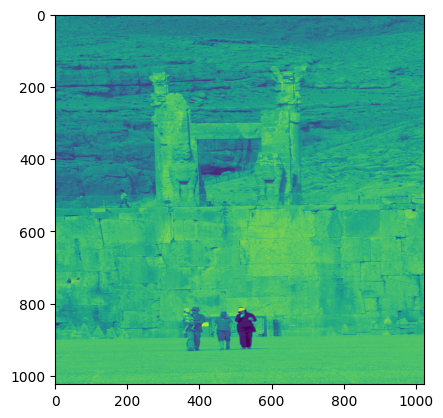

In [5]:
im_file = '../CS4243_2023_images_small/IMG_0699_1024.png'
img = cv2.imread(im_file, 0)
plt.imshow(img)

In [10]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
filter0 = ButterworthBandPass(1024, 1024, 0.05, 0.1, 1)
filter1 = ButterworthBandPass(1024, 1024, 0.1, 0.2, 1)
filter2 = ButterworthBandPass(1024, 1024, 0.2, 0.4, 1)
filter3 = ButterworthBandPass(1024, 1024, 0.4, 0.8, 1)

shift_abs = np.abs(fshift)
shift_angle = np.angle(fshift)

filteredf0 = np.multiply(filter0, shift_abs)
z_f0 = np.multiply(filteredf0, np.exp((1j) * (shift_angle)))
invshiftf0 = np.fft.ifftshift(z_f0)
resultf0 = np.abs(np.fft.ifft2(invshiftf0))
powerf0 = am_power(resultf0)

filteredf1 = np.multiply(filter1, shift_abs)
z_f1 = np.multiply(filteredf1, np.exp((1j) * (shift_angle)))
invshiftf1 = np.fft.ifftshift(z_f1)
resultf1 = np.abs(np.fft.ifft2(invshiftf1))
powerf1 = am_power(resultf1)

filteredf2 = np.multiply(filter2, shift_abs)
z_f2 = np.multiply(filteredf2, np.exp((1j) * (shift_angle)))
invshiftf2 = np.fft.ifftshift(z_f2)
resultf2 = np.abs(np.fft.ifft2(invshiftf2))
powerf2 = am_power(resultf2)

filteredf3 = np.multiply(filter3, shift_abs)
z_f3 = np.multiply(filteredf3, np.exp((1j) * (shift_angle)))
invshiftf3 = np.fft.ifftshift(z_f3)
resultf3 = np.abs(np.fft.ifft2(invshiftf3))
powerf3 = am_power(resultf3)


print("Power of f0 =", powerf0)
print("Power of f1 =", powerf1)
print("Power of f2 =", powerf2)
print("Power of f3 =", powerf3)

Power of f0 = 157.70110624813606
Power of f1 = 144.5120613853697
Power of f2 = 123.45115106233565
Power of f3 = 85.55513611346174


Conclusion: Answer is (b) on Canvas